In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.preferred_beliefs_by_pairs_configs import *
import scipy
import argparse
import copy

In [2]:
PAIRS_PATH = "/data/patrick_res/sessions/SA/pairs_at_least_3blocks_10sess_more_sess.pickle"


### Sam, Stim Onset, Temporal drive

In [3]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsByPairsConfigs()._asdict()
)
args.region_level = "drive"
args.regions = "Temporal"

res = io_utils.read_preferred_beliefs(args, pairs)




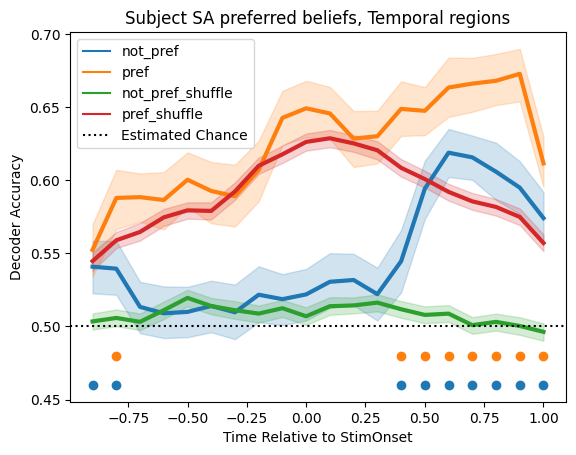

In [4]:
fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .05 / 20)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .05 / 20)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Stim Onset, with preference selective subpopulation

Warning, shuffle not found: /data/patrick_res/preferred_beliefs/SA_StimOnset_Response_Correct_PreferredChosen_True_95th_all_time_units/shuffles/CIRCLE_RIPPLE_shuffle_3_test_accs.npy
Warning, shuffle not found: /data/patrick_res/preferred_beliefs/SA_StimOnset_Response_Correct_PreferredChosen_True_95th_all_time_units/shuffles/CIRCLE_RIPPLE_shuffle_4_test_accs.npy
Warning, shuffle not found: /data/patrick_res/preferred_beliefs/SA_StimOnset_Response_Correct_PreferredChosen_True_95th_all_time_units/shuffles/CIRCLE_RIPPLE_shuffle_9_test_accs.npy


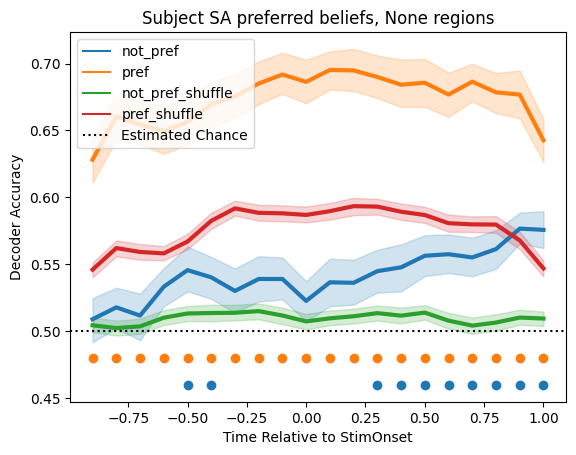

In [5]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsByPairsConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .05 / 20)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .05 / 20)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

In [6]:
pairs

,pair,sessions,num_sessions,dim_type
0,"[CIRCLE, SQUARE]","[20180615, 20180709, 20180802, 20180803, 20180...",14,within dim
1,"[CIRCLE, GREEN]","[20180802, 20180806, 20180808, 20180813, 20180...",11,across dim
2,"[CIRCLE, YELLOW]","[20180802, 20180810, 20180813, 20180821, 20180...",13,across dim
3,"[CIRCLE, RIPPLE]","[20180615, 20180802, 20180803, 20180810, 20180...",10,across dim
4,"[SQUARE, CYAN]","[20180801, 20180802, 20180803, 20180820, 20180...",11,across dim
5,"[SQUARE, GREEN]","[20180802, 20180806, 20180808, 20180830, 20180...",10,across dim
6,"[SQUARE, MAGENTA]","[20180801, 20180802, 20180803, 20180806, 20180...",11,across dim
7,"[SQUARE, YELLOW]","[20180801, 20180802, 20180810, 20180820, 20180...",12,across dim
8,"[SQUARE, ESCHER]","[20180803, 20180808, 20180810, 20180820, 20180...",10,across dim
9,"[CYAN, MAGENTA]","[20180705, 20180801, 20180802, 20180803, 20180...",11,within dim


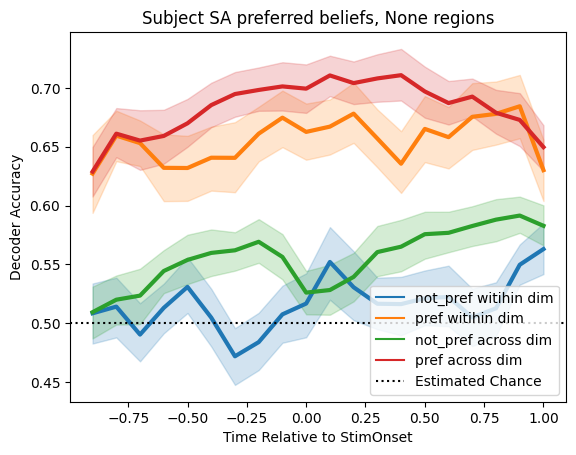

In [11]:
across_dim_res = io_utils.read_preferred_beliefs(args, pairs[pairs.dim_type == "across dim"], num_shuffles=0)
across_dim_res["condition"] = across_dim_res["condition"] + " across dim"
within_dim_res =  io_utils.read_preferred_beliefs(args, pairs[pairs.dim_type == "within dim"], num_shuffles=0)
within_dim_res["condition"] = within_dim_res["condition"] + " witihin dim"
dim_res = pd.concat([within_dim_res, across_dim_res])

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, dim_res, ax)

### Sam, Stim Onset, Anterior drive

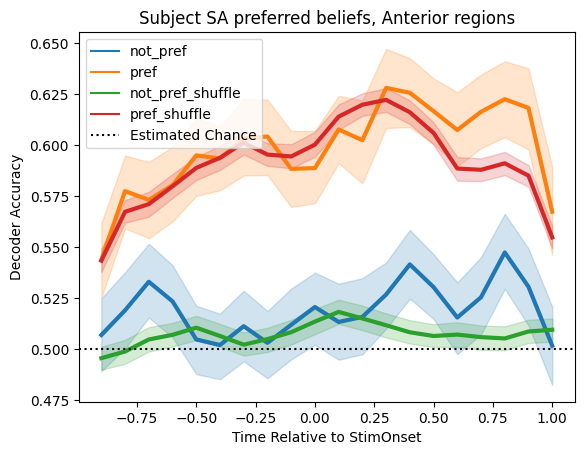

In [26]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.region_level = "drive"
args.regions = "Anterior"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)


### Sam, FeedbackOnset, Long Pre

Text(0.5, 1.0, 'Feedback Onset, all regions')

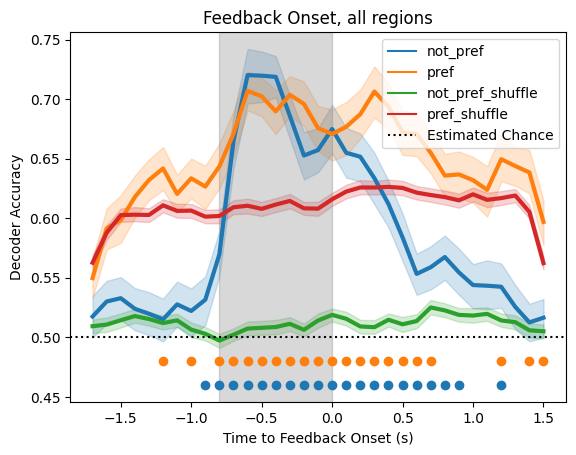

In [12]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref", alpha = 0.05 / 18)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref", alpha = 0.05 / 18)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")
ax.set_xlabel("Time to Feedback Onset (s)")
ax.set_title("Feedback Onset, all regions")

### Sam, FeedbackOnset, Long Pre, Temporal

Text(0.5, 1.0, 'Feedback Onset, temporal regions')

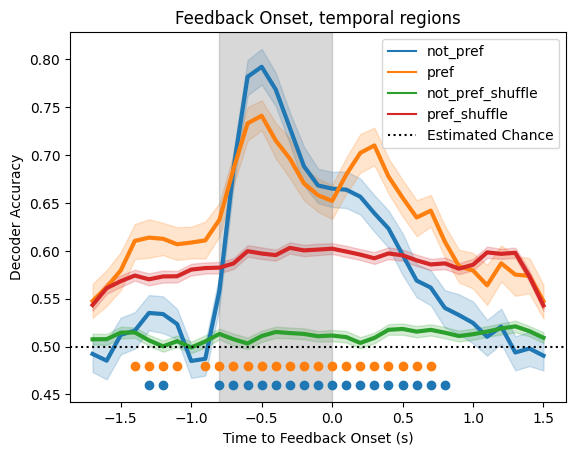

In [6]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.region_level = "drive"
args.regions = "Temporal"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref")
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

ax.set_xlabel("Time to Feedback Onset (s)")
ax.set_title("Feedback Onset, temporal regions")


### Sam, decision time warped

Text(0.5, 0, 'Time to Stim Onset (s)')

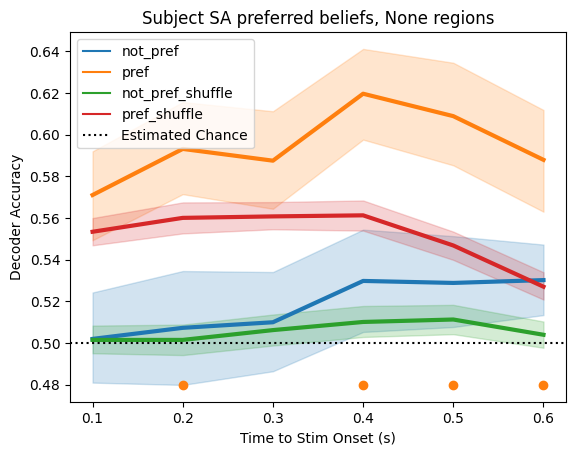

In [8]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.trial_event = "decision_warped"
# args.region_level = "drive"
# args.regions = "Temporal"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref")
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

ax.set_xlabel("Time to Stim Onset (s)")


### Sam, decision time warped, temporal

Text(0.5, 0, 'Time to Stim Onset (s)')

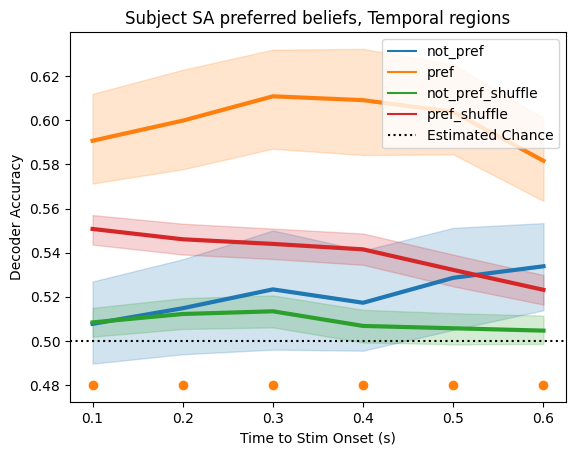

In [7]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.trial_event = "decision_warped"
args.region_level = "drive"
args.regions = "Temporal"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref")
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

ax.set_xlabel("Time to Stim Onset (s)")


### Sam, FeedbackOnset, Long Pre, Trial Residual FRs

Text(0.5, 1.0, 'Feedback Onset, all regions, with trial residual FRs')

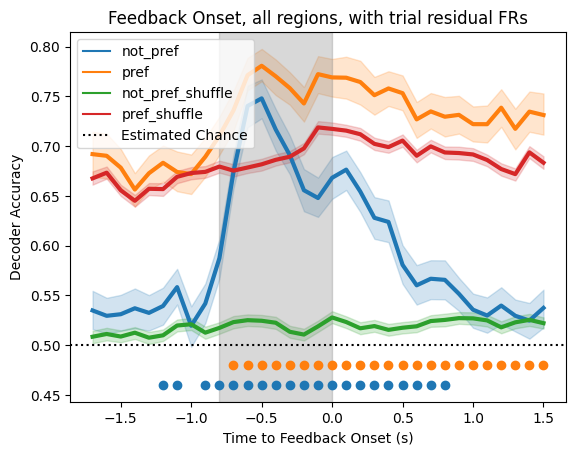

In [8]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.fr_type = "trial_residual_firing_rates"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref")
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")
ax.set_xlabel("Time to Feedback Onset (s)")
ax.set_title("Feedback Onset, all regions, with trial residual FRs")

 ### Sam, FeedbackOnset, Long Pre, White Noise FRs

Text(0.5, 1.0, 'Feedback Onset, all regions, with white noise FRs')

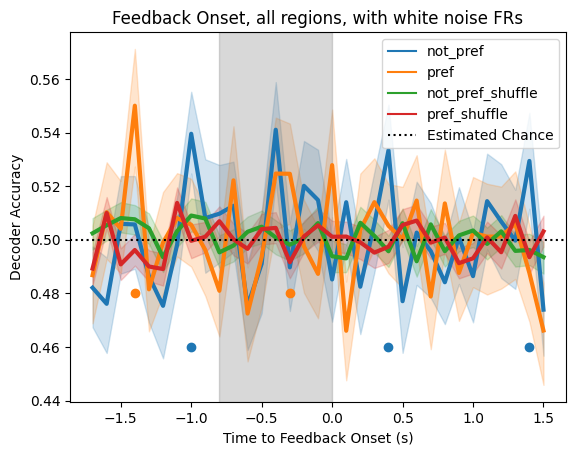

In [13]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.fr_type = "white_noise_firing_rates"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref", alpha=.01 / res.Time.nunique())
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref", alpha=.01 / res.Time.nunique())
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")
ax.set_xlabel("Time to Feedback Onset (s)")
ax.set_title("Feedback Onset, all regions, with white noise FRs")

### Sam, fb onset long, all vals

Text(0.5, 1.0, 'Feedback Onset, all regions, not just high vals')

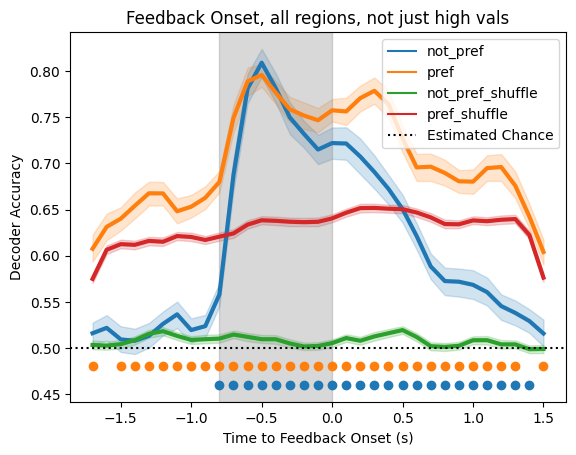

In [3]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.high_val_only = False

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref", alpha=.01 / res.Time.nunique())
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref", alpha=.01 / res.Time.nunique())
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")
ax.set_xlabel("Time to Feedback Onset (s)")
ax.set_title("Feedback Onset, all regions, not just high vals")

### Sam, Stim onset, all vals

Text(0.5, 1.0, 'Feedback Onset, all regions, not just high vals')

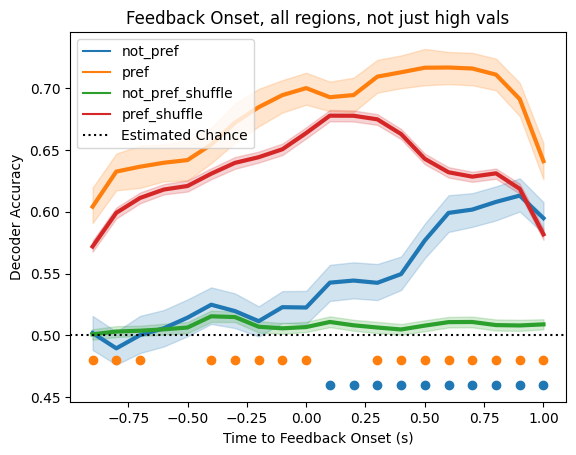

In [4]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.high_val_only = False

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref", alpha=.01 / res.Time.nunique())
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref", alpha=.01 / res.Time.nunique())
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")
ax.set_xlabel("Time to Feedback Onset (s)")
ax.set_title("Feedback Onset, all regions, not just high vals")

### Sam fb onset, all vals, temporal

Text(0.5, 1.0, 'Feedback Onset, all regions, not just high vals')

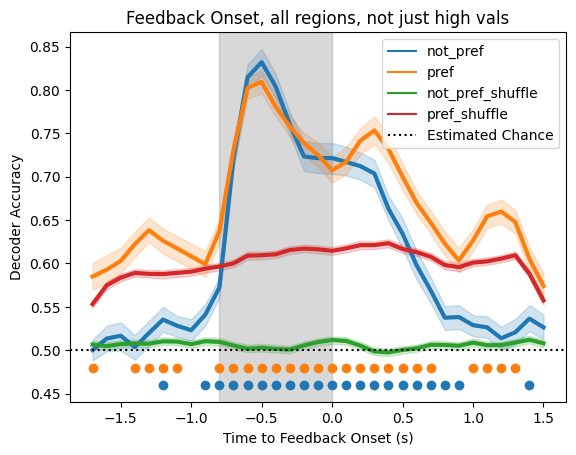

In [4]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.high_val_only = False
args.region_level = "drive"
args.regions = "Temporal"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref", alpha=.01 / res.Time.nunique())
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref", alpha=.01 / res.Time.nunique())
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")
ax.set_xlabel("Time to Feedback Onset (s)")
ax.set_title("Feedback Onset, all regions, not just high vals")

### Sam stim onset, all vals,temporal

Text(0.5, 1.0, 'Feedback Onset, all regions, not just high vals')

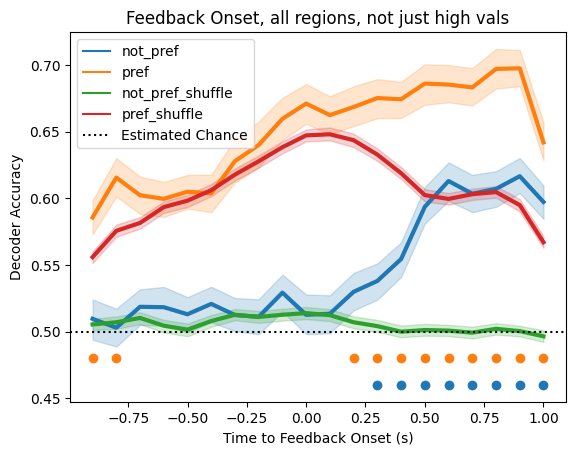

In [5]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **PreferredBeliefsConfigs()._asdict()
)
args.trial_event = "StimOnset"
args.high_val_only = False
args.region_level = "drive"
args.regions = "Temporal"

res = io_utils.read_preferred_beliefs(args, pairs)

fig, ax = plt.subplots()
# sub_res = res[res.Time > 0]
sub_res = res
visualization_utils.visualize_preferred_beliefs(args, sub_res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "pref", alpha=.01 / res.Time.nunique())
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(sub_res, "not_pref", alpha=.01 / res.Time.nunique())
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")
ax.set_xlabel("Time to Feedback Onset (s)")
ax.set_title("Feedback Onset, all regions, not just high vals")